# Perceptron
The perceptron is an iterative algorithm that classifies binary separable data. The algorithm takes multiple inputs ($x_i$) and outputs binary data (0 or 1). For each input, there is weights, $w_i$ that indicates how important the input is. The algorithm can be defined as follows in mathematical form. 
Let's say there are $N$ number of binary data. Then, it goes
$$
    f(x) = 
    \begin{cases}
        1,\ \sum_{i=1}^N x_i * w_i + b \\
        0,\ otherwise
    \end{cases}
$$
where $x_i$ is input, $w_i$ is the weight and $b$ is the bias that shifts the boundary from the origin.

This equation can be simplified using vector notation. By extending the current dimension to $N+1$, the equation can be defined as follows.

$$ 
f(x) =
\begin{cases}
    1,\ w \cdot x  > 0 \\
    0,\ w \cdot x  \leq 0
\end{cases}
$$

where $w = (b, w_1, w_2, \ldots, w_N)$ and $x = (1, x_1, x_2, \ldots, x_N)$.

The goal of the algorithm is to find $w$ and $b$ so that it classifies binary data properly.

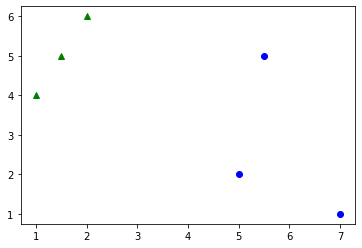

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random

# [x, y, label]
matrix = [
    [1,  4, 1],
    [2,  6, 1],
    [1.5,5, 1],
    [5,  2, 0],
    [7,  1, 0],
    [5.5,5, 0]
]

points1 = np.array([row[:2] for row in matrix if row[2] == 1])
points2 = np.array([row[:2] for row in matrix if row[2] == 0])

plt.plot(points1[:, 0], points1[:, 1], '^g')
plt.plot(points2[:, 0], points2[:, 1], 'ob')

plt.show()


[1 1 1]
[1 1 1]
[-4  0 -1]
[-2  1  5]
[-2  1  5]
[-2  1  5]
[-2  1  5]
[-7  0  3]
converged [-7  0  3]
/Users/edwardchung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in long_scalars


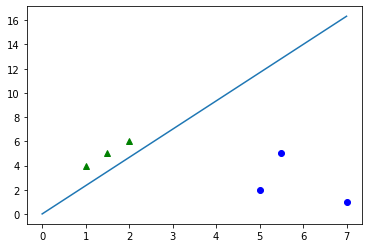

In [20]:
def convergence(matrix, w):
    points1 = [row[:2] for row in matrix if row[2] == 1]

    for point in points1:
        if np.dot(w, np.insert(point, 1, 1)) < 0:
            return False
    
    points2 = [row[:2] for row in matrix if row[2] == 0]

    for point in points2:
        if np.dot(np.array(w), np.insert(point, 1, 1)) > 0:
            return False
    
    return True

def y(w, x):
    return (w[0]/w[2])/(w[0]/w[1]) * -1 +  (w[0]/w[2]) * -1 * x

limit = 20
w = np.array([1, 1, 1])
minX = 0
maxX = 7

while True and limit > 0:
    if convergence(matrix, w):
        print('converged', w)
        break;
        
    randomIndex = random.randrange(0, len(matrix))
    row = matrix[randomIndex]
    point = row[:2]
    dataClass = row[2] # 0 or 1

    dotProduct = np.dot(w, np.insert(point, 1, 1))

    if dataClass == 1 and dotProduct < 0:
        w = np.add(w, np.insert(point, 1, 1))
    
    if dataClass == 0 and dotProduct > 0:
        w = np.subtract(w, np.insert(point, 1, 1))

    print(w)
    # y1 = y(w, 0)
    # y2 = y(w, 7)

    # plt.plot([0, 7], [y1, y2])
    # plt.show()

    limit -= 1

plt.plot(points1[:, 0], points1[:, 1], '^g')
plt.plot(points2[:, 0], points2[:, 1], 'ob')
plt.plot([0,7], [y(w, 0), y(w,7)])
plt.show()

# References
    - [Perceptron](https://www.youtube.com/watch?v=4Gac5I64LM4)